# Visualization tutorial

This tutorial show the visualization process of our processed Stereo-seq mosue midbrain dataset

- The command for running on this dataset is:

In [ ]:
ONTraC \
    --meta-input data/stereo_seq_brain/original_data.csv \
    --NN-dir output/stereo_seq_NN \
    --GNN-dir output/stereo_seq_GNN \
    --NT-dir output/stereo_seq_NT \
    --device cuda \
    -s 42 \
    --lr 0.03 \
    --hidden-feats 4 \
    -k 6 \
    --modularity-loss-weight 0.3 \
    --regularization-loss-weight 0.1 \
    --purity-loss-weight 300 \
    --beta 0.03 2>&1 | tee log/stereo_seq.log

```{note}
The input dataset and output files could be downloaded from our [Zenodo repository](https://zenodo.org/records/15571644/files/Stereo_seq_data.zip).

## Preparation

### Install Required Packages

In [ ]:
pip install "ONTraC[analysis]"

### Load Dataset

In [2]:
import requests

# URL of the file
url = "https://zenodo.org/records/15571644/files/Stereo_seq_data.zip"

# Local file path to save the file
file_path = "./Stereo_seq_data.zip"

try:
    # Send a GET request to the URL
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful

    # Write the content to the file
    with open(file_path, "wb") as file:
        file.write(response.content)

    print(f"File downloaded and saved to {file_path}")
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")


File downloaded and saved to ./Stereo_seq_data.zip


In [3]:
import zipfile

# Path to the zip file
zip_file_path = "Stereo_seq_data.zip"

# Directory where files will be extracted
extract_to_path = "./"

try:
    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all files to the specified directory
        zip_ref.extractall(extract_to_path)

    print(f"Files extracted to '{extract_to_path}'")
except zipfile.BadZipFile:
    print("The file is not a valid zip file.")


Files extracted to './'


## Visualization through Command Line

In [ ]:
ONTraC_analysis \
    -o analysis_output/stereo_seq \
    -l Stereo_seq_data/ONTraC_run_log/stereo_midbrain_base.log \
    --NN-dir Stereo_seq_data/ONTraC_output/stereo_midbrain_base_NN \
    --GNN-dir Stereo_seq_data/ONTraC_output/stereo_midbrain_base_GNN \
    --NT-dir Stereo_seq_data/ONTraC_output/stereo_midbrain_base_NT \
    -r

## Visualization Step-by-step

If you want to adjust the figures, here is the example codes for step-by-step analysis using Python.
We recommand you using jupyter notebook or jupyter lab here.

### Load Modules

In [5]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns

from ONTraC.analysis.data import AnaData

### Plotting Preparation

In [6]:
from optparse import Values

options = Values()
options.NN_dir = 'Stereo_seq_data/ONTraC_output/stereo_midbrain_base_NN'
options.GNN_dir = 'Stereo_seq_data/ONTraC_output/stereo_midbrain_base_GNN'
options.NT_dir = 'Stereo_seq_data/ONTraC_output/stereo_midbrain_base_NT'
options.log = 'Stereo_seq_data/ONTraC_run_log/stereo_midbrain_base.log'
options.reverse = True  # Set it to False if you don't want reverse NT score
options.output = None  # We save the output figure by our self here
ana_data = AnaData(options)

### Spatial Cell Type Distribution

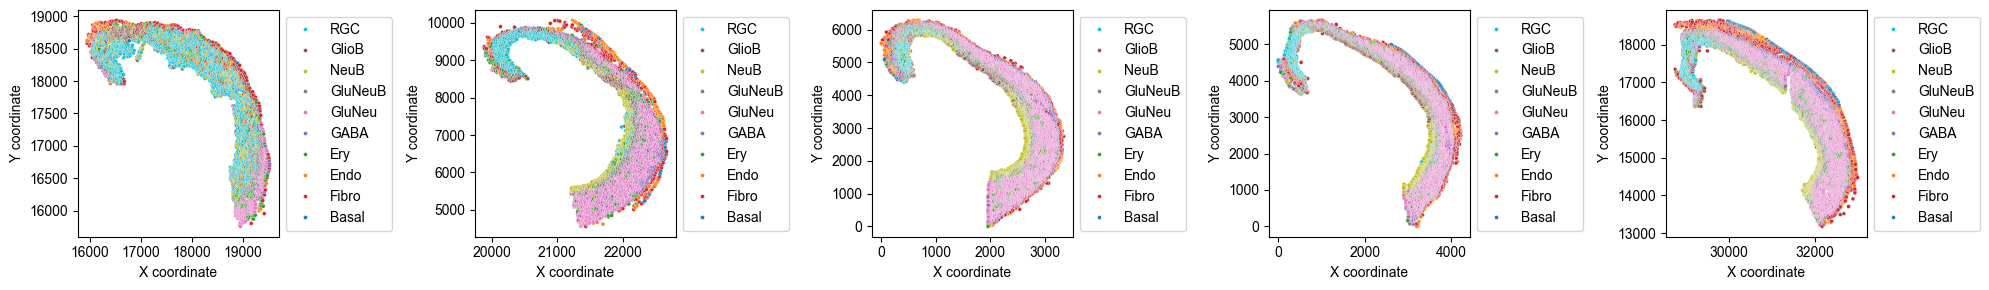

In [7]:
from ONTraC.analysis.cell_type import plot_spatial_cell_type_distribution_dataset_from_anadata

fig, axes = plot_spatial_cell_type_distribution_dataset_from_anadata(ana_data = ana_data,
                                                                     hue_order = ['RGC', 'GlioB', 'NeuB', 'GluNeuB', 'GluNeu', 'GABA', 'Ery', 'Endo', 'Fibro', 'Basal'])

for ax in axes:
    # ax.set_aspect('equal', 'box')  # uncomment this line if you want set the x and y axis with same scaling
    # ax.set_xticks([])  # uncomment this line if you don't want to show x coordinates
    # ax.set_yticks([]) # uncomment this line if you don't want to show y coordinates
    pass

fig.tight_layout()
# fig.savefig('figures/Spatial_cell_type.png', dpi=150)  # uncomment this line if you want save the results

### Spatial Cell Type Composition Distribution

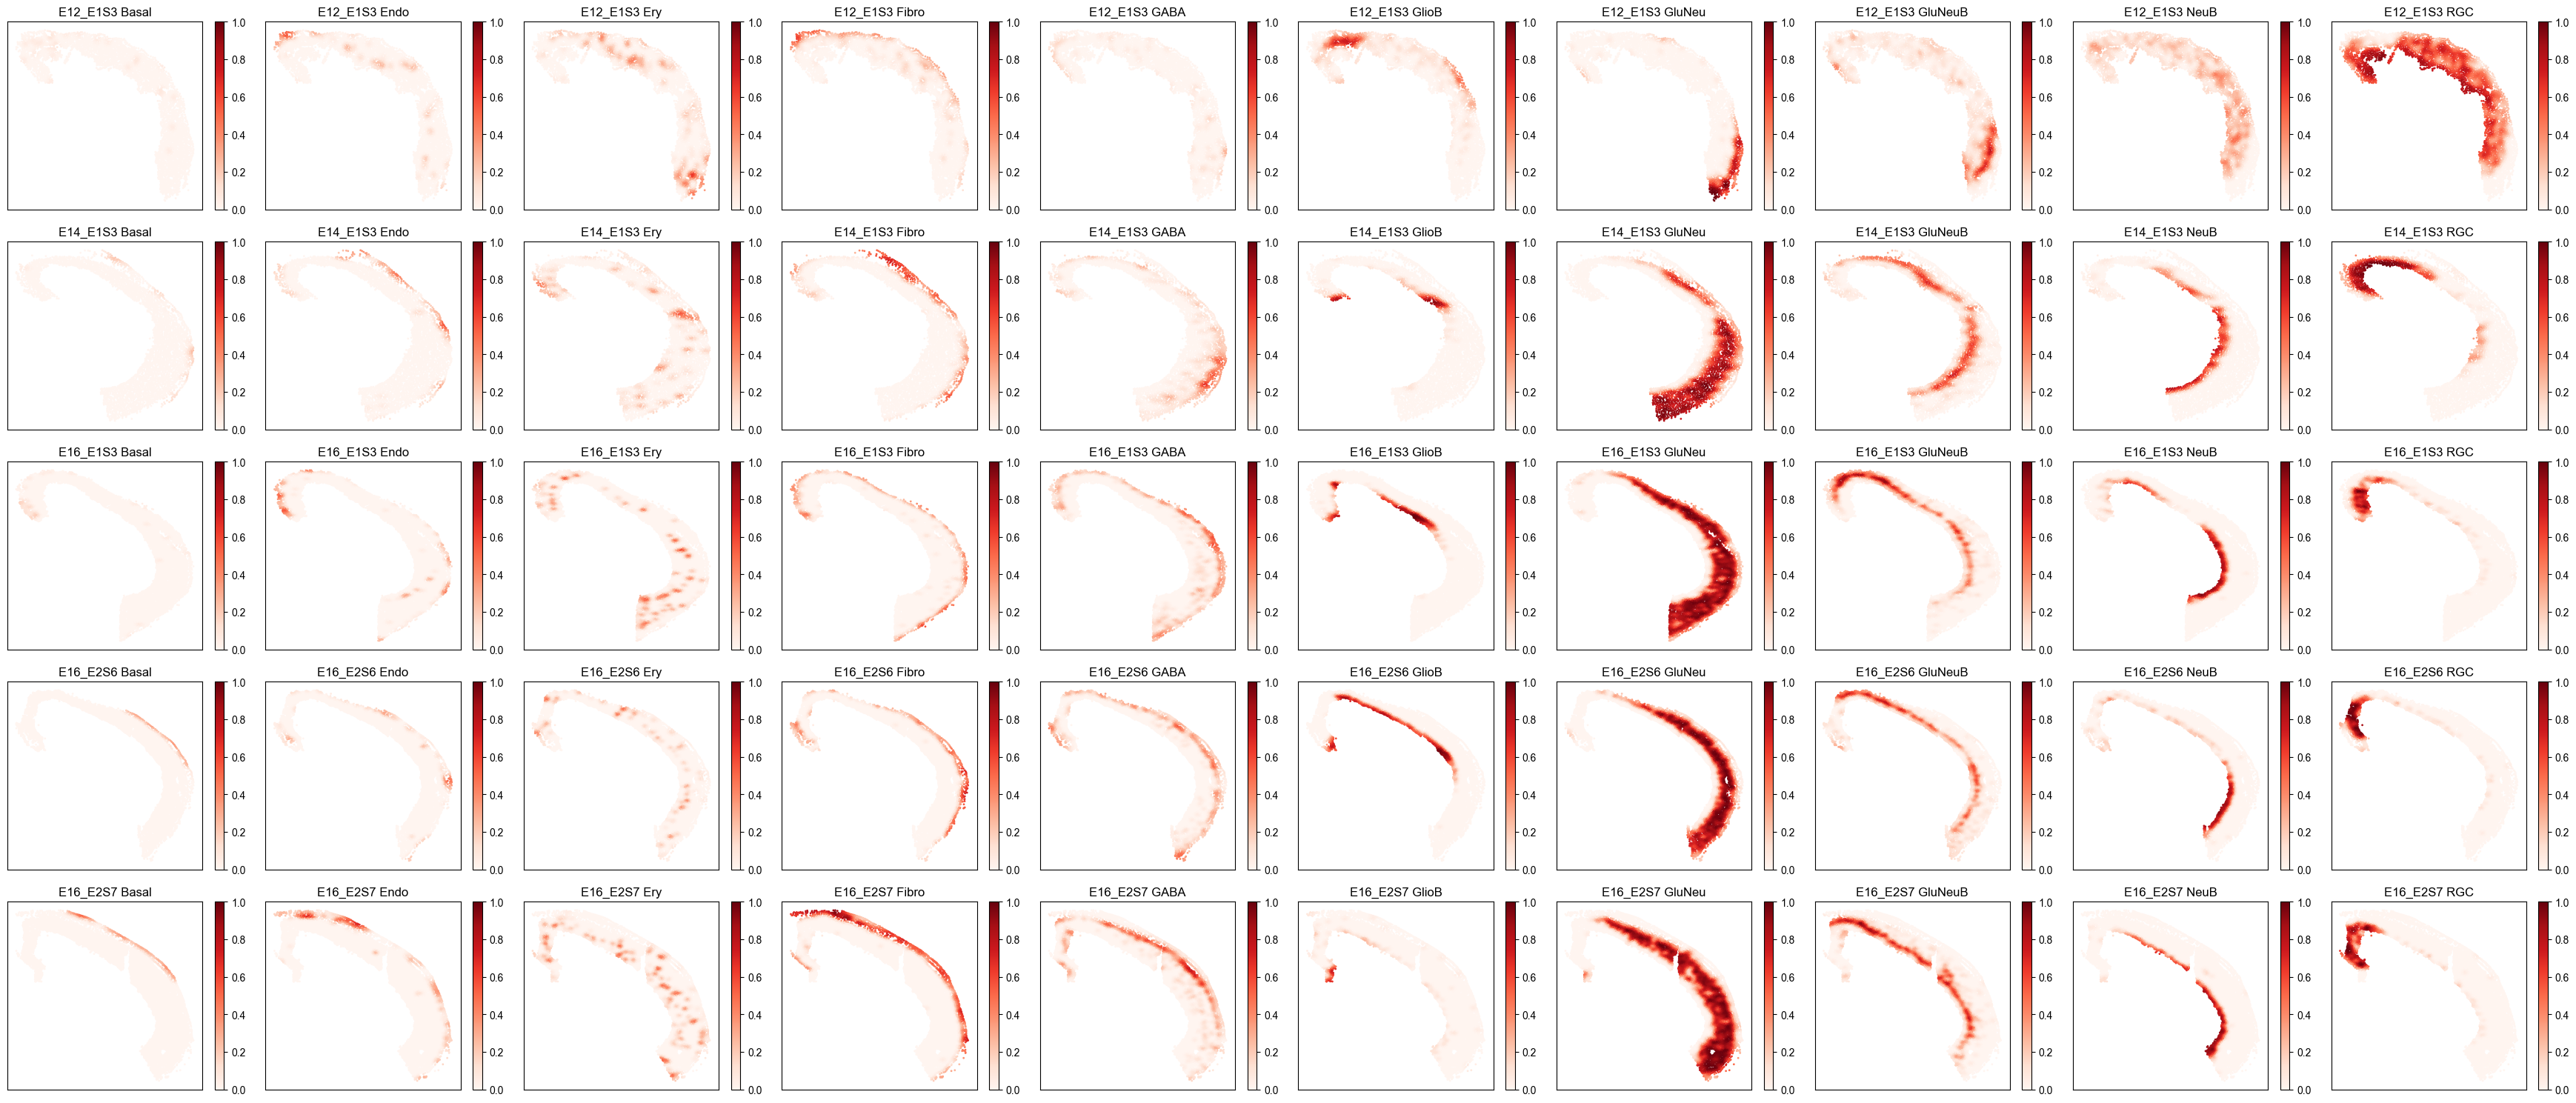

In [8]:
from ONTraC.analysis.spatial import plot_cell_type_composition_dataset_from_anadata

fig, axes = plot_cell_type_composition_dataset_from_anadata(ana_data=ana_data)
# fig.savefig('figures/cell_type_compostion.png', dpi=100)  # uncomment this line if you want save the results

### Niche Cluster

#### Spatial Niche Cluster Loadings Distribution

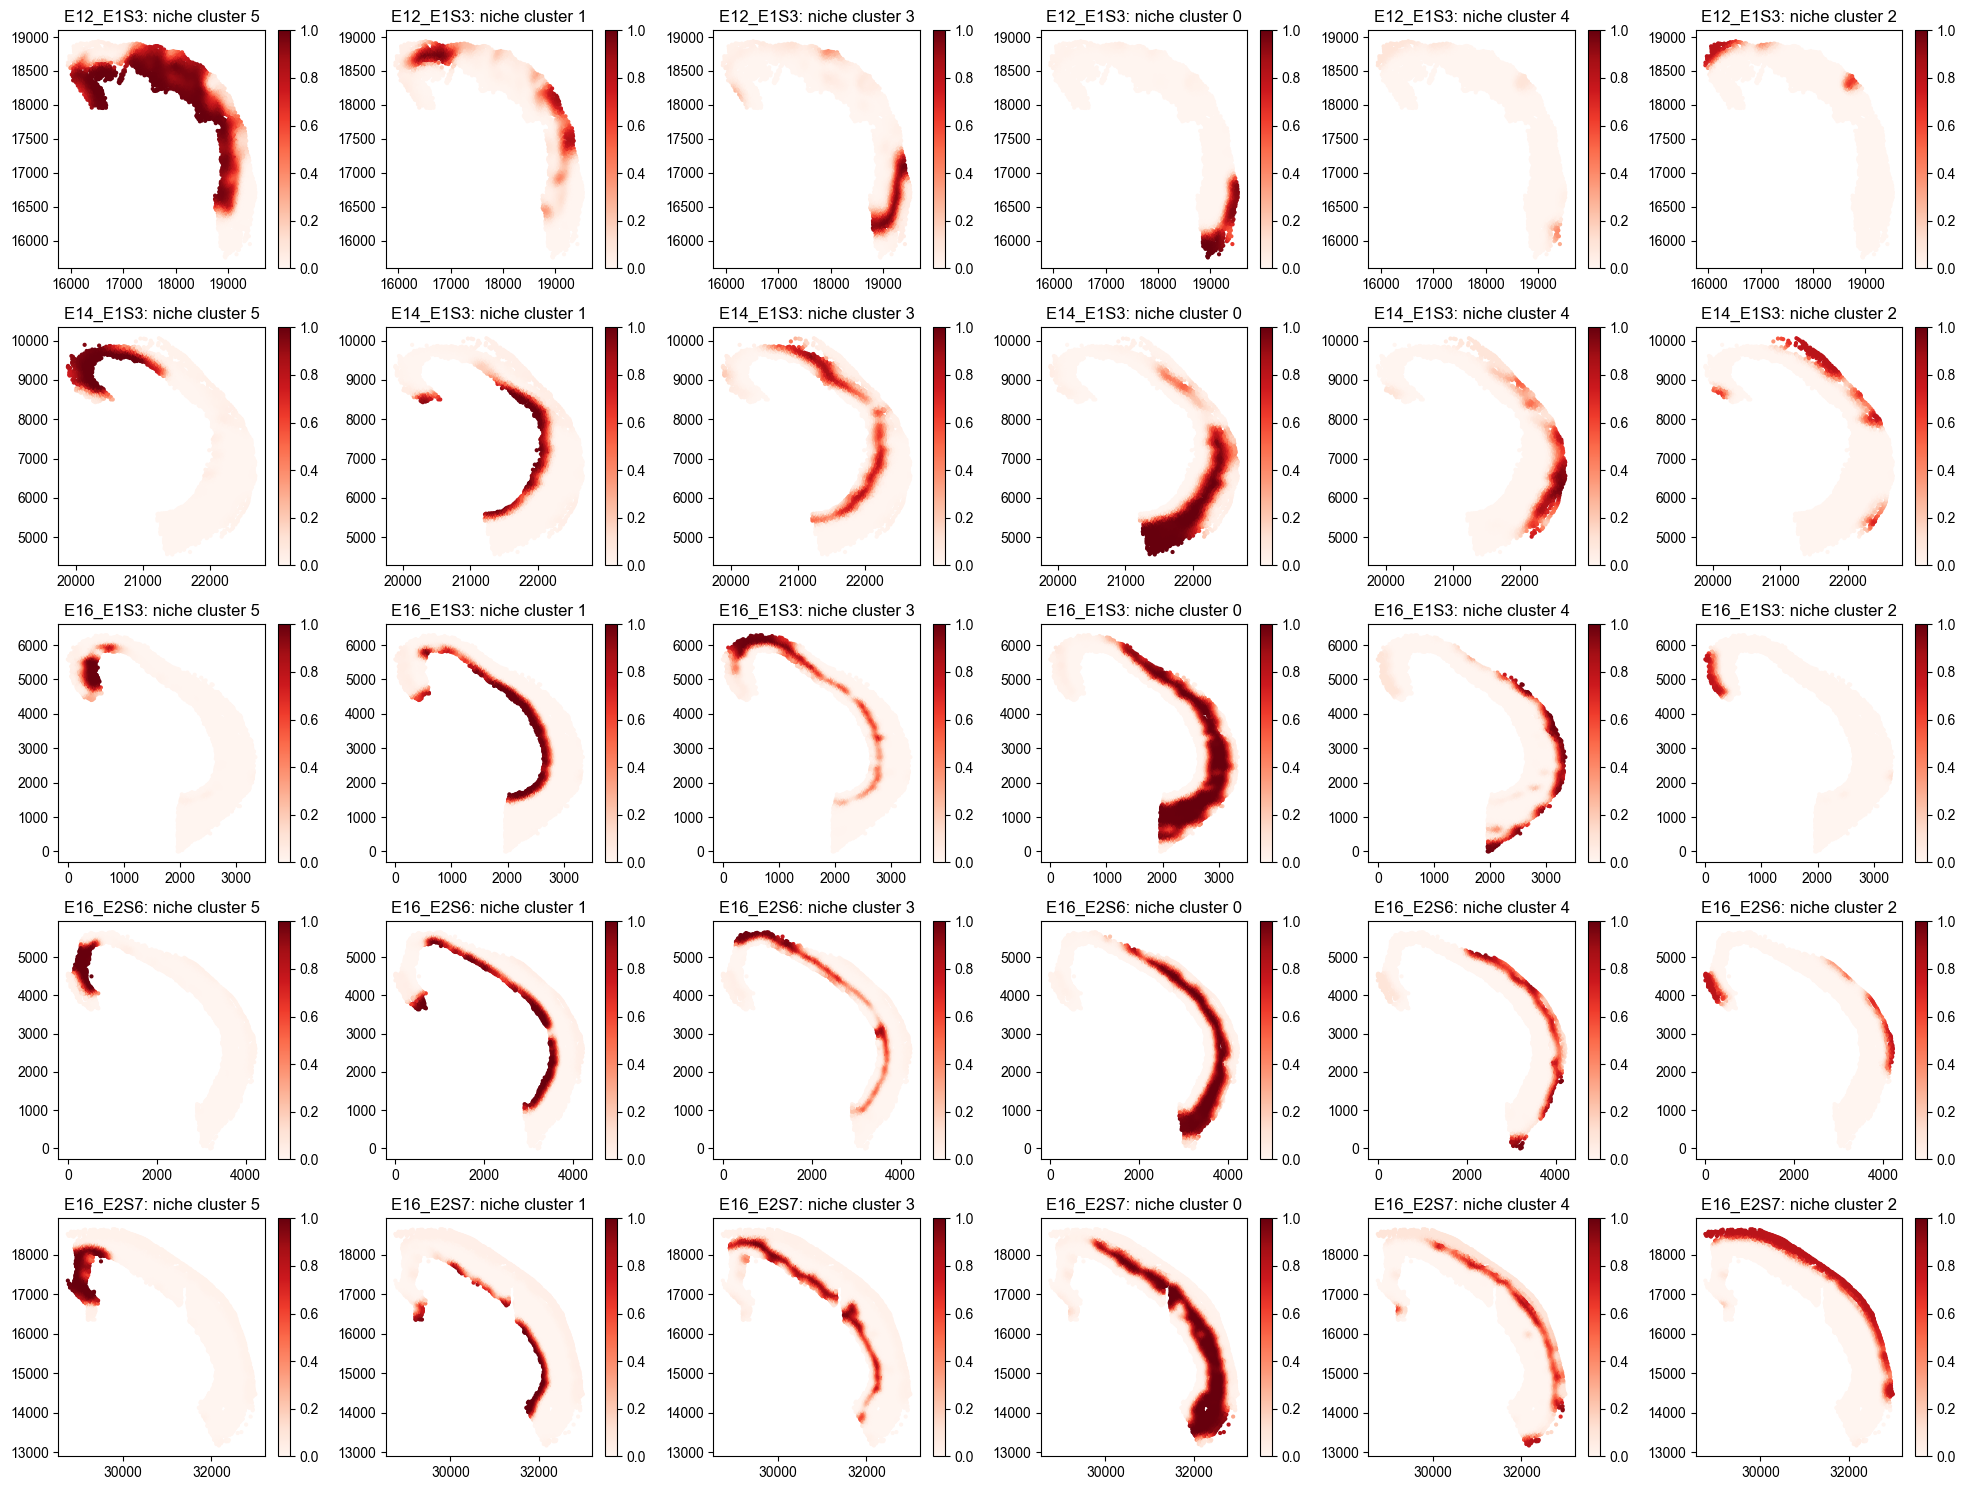

In [9]:
from ONTraC.analysis.niche_cluster import plot_niche_cluster_loadings_dataset_from_anadata

fig, axes = plot_niche_cluster_loadings_dataset_from_anadata(ana_data=ana_data)
# fig.savefig('figures/Spatial_niche_clustering_loadings.png', dpi=100)  # uncomment this line if you want save the results

#### Niche Cluster Connectivity

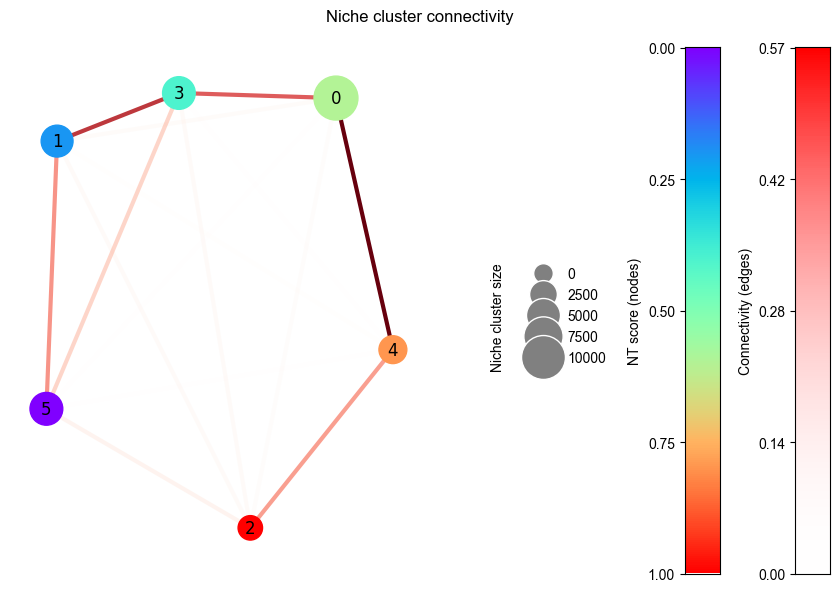

In [10]:
from ONTraC.analysis.niche_cluster import plot_niche_cluster_connectivity_from_anadata

fig, axes = plot_niche_cluster_connectivity_from_anadata(ana_data=ana_data)
# fig.savefig('figures/Niche_cluster_connectivity.png', dpi=300)  # uncomment this line if you want save the results

```{note}
This figure show the spatial connectivity between each niche cluster which will be used for niche trajectory construction.

#### Niche Cluster Proportion

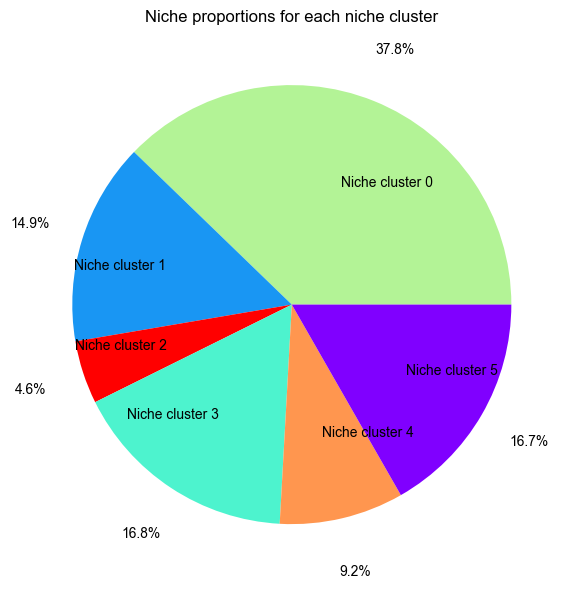

In [11]:
from ONTraC.analysis.niche_cluster import plot_cluster_proportion_from_anadata

fig, ax = plot_cluster_proportion_from_anadata(ana_data=ana_data)
# fig.savefig('figures/Niche_cluster_proportions.png', dpi=300)  # uncomment this line if you want save the results

### Cell Type X Niche Cluster

#### Number of Cells of Each Cell Type in Each Niche Cluster

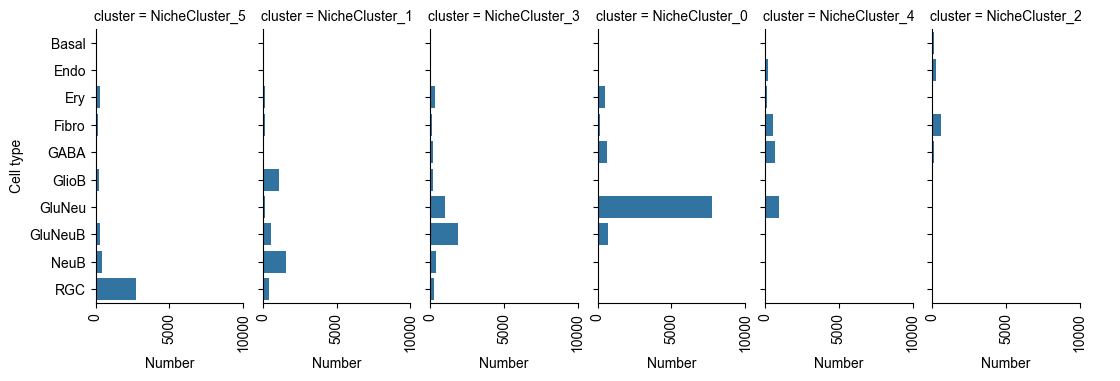

In [12]:
from ONTraC.analysis.cell_type import plot_cell_type_loading_in_niche_clusters_from_anadata

g = plot_cell_type_loading_in_niche_clusters_from_anadata(ana_data=ana_data)
# g.savefig('figures/cell_type_loading_in_niche_clusters.png', dpi=300)  # uncomment this line if you want save the results

#### Cell Type Composition Normalized by Each Niche Cluster

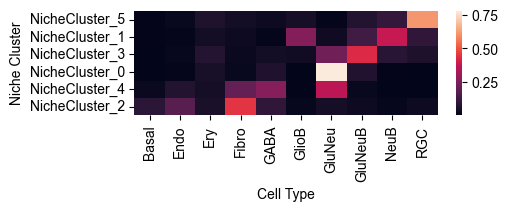

In [13]:
from ONTraC.analysis.cell_type import plot_cell_type_com_in_niche_clusters_from_anadata

fig, ax = plot_cell_type_com_in_niche_clusters_from_anadata(ana_data=ana_data)
# fig.savefig('figures/cell_type_composition_in_niche_clusters.png', dpi=300)  # uncomment this line if you want save the results

```{note}
This heatmap show the cell type composition within each niche cluster. Sum of each row equals to 1.

#### Cell Type Composition Normalized by Each Cell Type

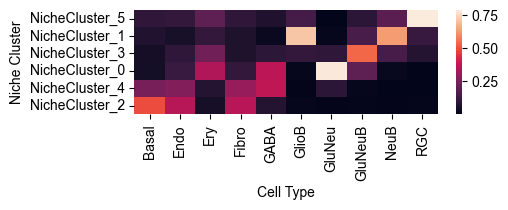

In [14]:
from ONTraC.analysis.cell_type import plot_cell_type_dis_across_niche_cluster_from_anadata

fig, ax = plot_cell_type_dis_across_niche_cluster_from_anadata(ana_data=ana_data)
# fig.savefig('figures/cell_type_dis_across_niche_cluster.png', dpi=300)  # uncomment this line if you want save the results

```{note}
This heatmap show the cell type distribution across niche clusters. Sum of each column equals to 1.

### Spatial Niche-level NT Score Distribution

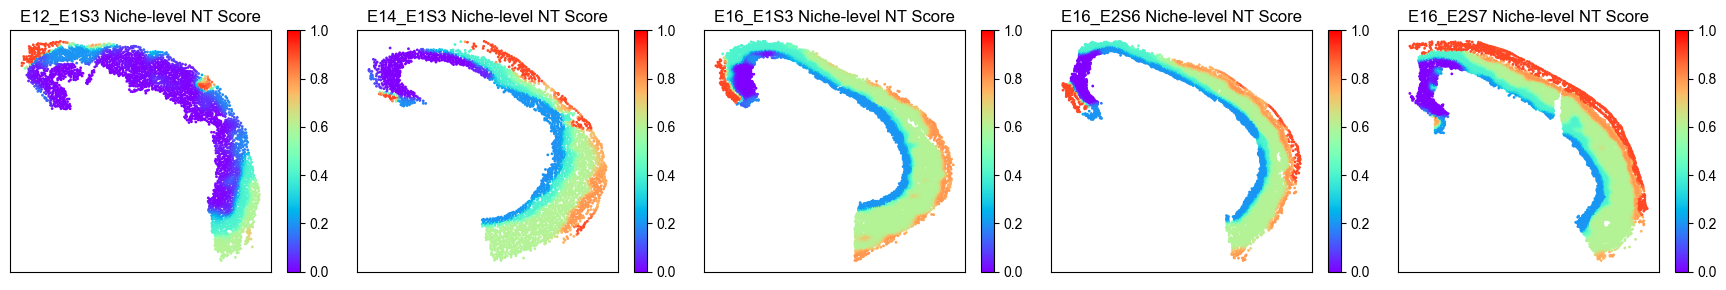

In [15]:
from ONTraC.analysis.spatial import plot_niche_NT_score_dataset_from_anadata

fig, ax = plot_niche_NT_score_dataset_from_anadata(ana_data=ana_data)
# fig.savefig('figures/niche_NT_score.png', dpi=200)  # uncomment this line if you want save the results

### Spatial Cell-level NT Score Distribution

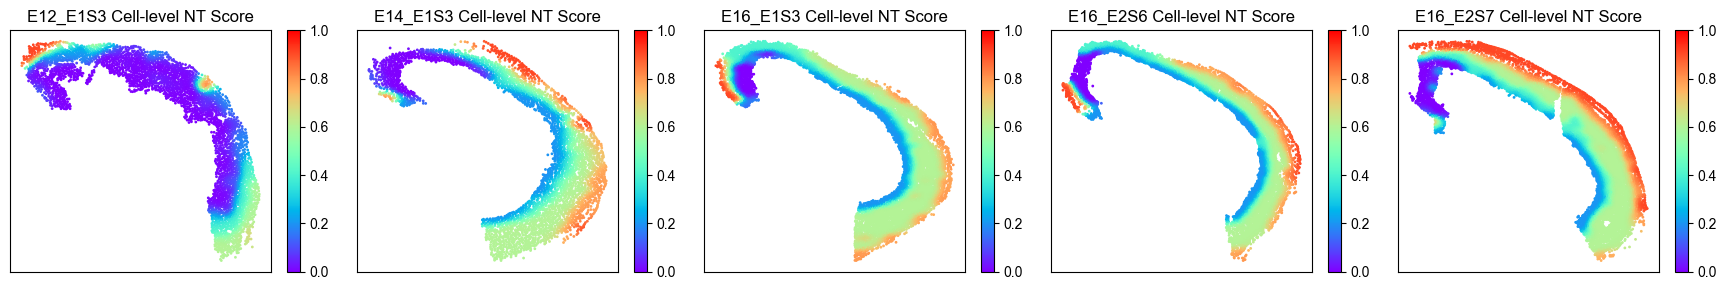

In [16]:
from ONTraC.analysis.spatial import plot_cell_NT_score_dataset_from_anadata

fig, ax = plot_cell_NT_score_dataset_from_anadata(ana_data=ana_data)
# fig.savefig('figures/cell_NT_score.png', dpi=200)  # uncomment this line if you want save the results

### Cell-level NT Score Distribution for Each Cell Type

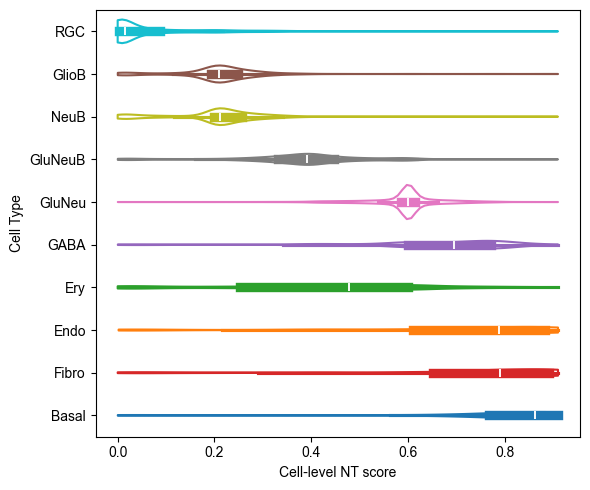

In [17]:
from ONTraC.analysis.cell_type import plot_violin_cell_type_along_NT_score_from_anadata

fig, ax = plot_violin_cell_type_along_NT_score_from_anadata(ana_data=ana_data,
                                                            order=['RGC', 'GlioB', 'NeuB', 'GluNeuB', 'GluNeu', 'GABA', 'Ery', 'Endo', 'Fibro', 'Basal'],  # change based on your own dataset or remove this line
                                                           )
# fig.savefig('figures/cell_type_along_NT_score_violin.png', dpi=300)  # uncomment this line if you want save the results